In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
#from grouper import group_by_volume, group_by_time
#from pyfolio.timeseries import perf_stats
from utils import chart_price, plot, perf, v_backtester, c_backtester, perf_var, summary
import sys
sys.path.append('/home/tomek/ib_tools')
from datastore import ArcticStore
import matplotlib.pyplot as plt
%matplotlib inline
from typing import List

In [2]:
symbol = 'NQ'

In [3]:
store = ArcticStore('TRADES_30_secs')


Library created, but couldn't enable sharding: no such command: 'enablesharding', full error: {'ok': 0.0, 'errmsg': "no such command: 'enablesharding'", 'code': 59, 'codeName': 'CommandNotFound'}. This is OK if you're not 'admin'


In [4]:
df_2018 = store.contfuture(symbol, index=-4).loc['20180601': '20181231']
df_2019 = store.contfuture(symbol, index=-4).loc['20190101':'20191231']
df_2020 = store.contfuture(symbol, index=-1).loc['20200101':'20201231']
df_2021 = store.contfuture(symbol, index=-1).loc['20210101':]
dfs = [df_2018, df_2019, df_2020, df_2021]

In [5]:
def mean_vol(df: pd.DataFrame, unit: str = '60min', periods: str = '1M') -> pd.DataFrame:
    return df.resample(unit).apply({'close': 'mean', 'volume': 'sum'}).resample(periods).mean()

In [6]:
def vol_table(dfs: List[pd.DataFrame], unit:str = '60min', periods: str = '1M') -> pd.DataFrame:
    out = []
    for df in dfs:
        out.append(mean_vol(df, unit, periods)['volume'])
    return out

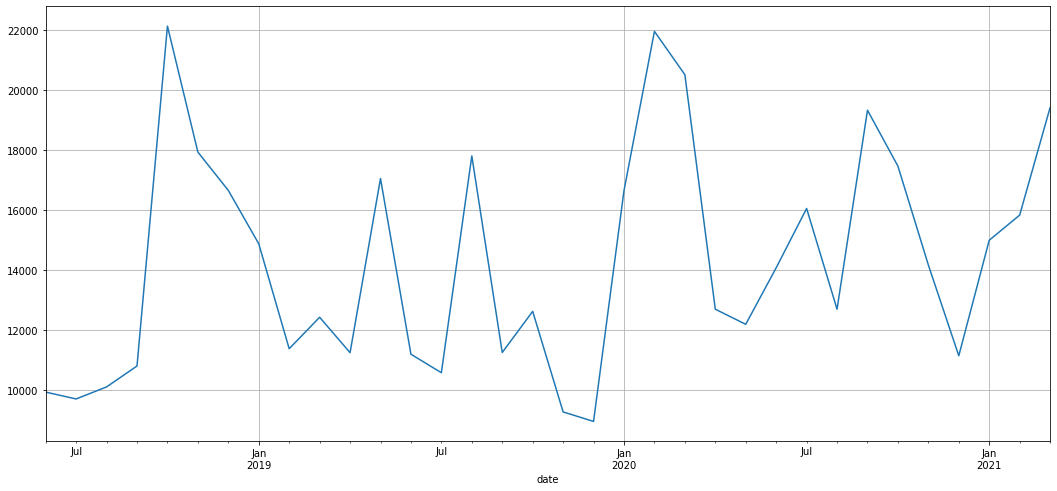

In [7]:
data = pd.concat(vol_table(dfs))
data.plot(figsize=(18,8), grid=True);

In [8]:
data

date
2018-06-30     9917.837500
2018-07-31     9688.587366
2018-08-31    10090.379032
2018-09-30    10788.356944
2018-10-31    22130.358871
2018-11-30    17925.922222
2018-12-31    16647.796770
2019-01-31    14865.905556
2019-02-28    11364.781250
2019-03-31    12414.915323
2019-04-30    11233.022222
2019-05-31    17044.604839
2019-06-30    11181.234722
2019-07-31    10564.079301
2019-08-31    17797.846774
2019-09-30    11238.937500
2019-10-31    12612.483871
2019-11-30     9256.300000
2019-12-31     8938.811575
2020-01-31    16639.619444
2020-02-29    21954.261494
2020-03-31    20509.161290
2020-04-30    12683.322222
2020-05-31    12179.426075
2020-06-30    14065.020833
2020-07-31    16044.920699
2020-08-31    12683.145161
2020-09-30    19323.227778
2020-10-31    17457.186828
2020-11-30    14158.100000
2020-12-31    11130.359354
2021-01-31    14983.808036
2021-02-28    15823.346726
2021-03-31    19412.017621
Freq: M, Name: volume, dtype: float64